# Dimensionality Reduction

Perform principle component analysis (PCA) on the data to extract important features.

---

In [30]:
%load_ext autoreload
%autoreload 2
import os
import dask
import panel
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import nisardev as nisar
import grimpfunc as grimp
import numpy as np
from sklearn.manifold import TSNE
import xarray as xr
import matplotlib.pyplot as plt
from dask.diagnostics import ProgressBar
ProgressBar().register()
dask.config.set(num_workers=2)  # Avoid problems with too many open connections at NSIDC
panel.extension() 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
data = xr.open_dataset('../data/clean/Filtered_ZachariaeIsstromVelocitySeries.nc')

In [51]:
# Convert to pandas dataframe
df_data = data.to_dataframe().reset_index()

df_data.head()

,time,cleaned_velocity
0,2015-01-30 12:00:00,1135.628052
1,2015-02-11 12:00:00,1041.293701
2,2015-02-23 12:00:00,1160.172729
3,2015-06-23 12:00:00,1089.291016
4,2015-07-05 12:00:00,1209.279053


In [53]:
type(df_data.time[0])

pandas._libs.tslibs.timestamps.Timestamp

/var/folders/z2/t78xbk451n74r4q5p4w1zt640000gn/T/ipykernel_45785/2698834201.py:1: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  data_flat = data.to_array().values.reshape(data.dims['time'], -1)


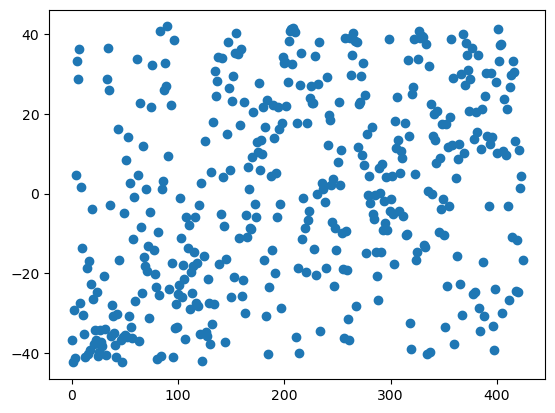

In [33]:
data_flat = data.to_array().values.reshape(data.dims['time'], -1)

# Perform t-SNE
valid_n_components = min(data_flat.shape[0], data_flat.shape[1])
tsne = TSNE(n_components=valid_n_components, random_state=42)
tsne_results = tsne.fit_transform(data_flat)

# Convert the t-SNE results back to an xarray DataArray
tsne_da = xr.DataArray(tsne_results, dims=['time', 'tsne_component'], name='tsne_results')

plt.scatter(tsne_da.time, tsne_da[:, 0])

In [34]:
%matplotlib inline
import pandas as pd # for using pandas daraframe
import numpy as np # for som math operations
from sklearn.preprocessing import StandardScaler # for standardizing the Data
from sklearn.decomposition import PCA # for PCA calculation
import matplotlib.pyplot as plt # for plotting

In [54]:
df = pd.DataFrame(df_data)

In [56]:
df['time'] = df['time'].astype('int64') // 10**9  # Convert 'Timestamp' to seconds since epoch
X = df.values  # getting all values as a matrix of dataframe 
sc = StandardScaler()  # creating a StandardScaler object
X_std = sc.fit_transform(X)  # standardizing the data


In [57]:
pca = PCA()
X_pca = pca.fit(X_std)

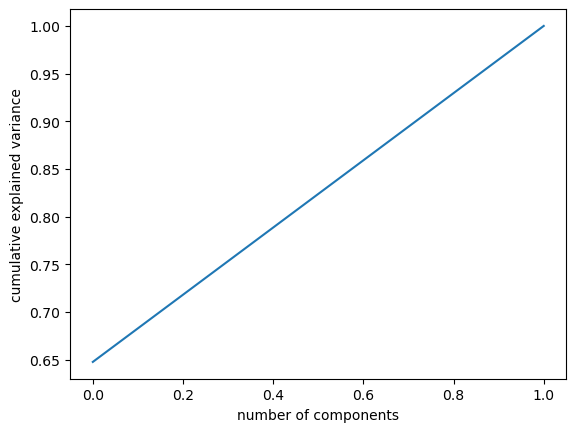

In [58]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');